# Line Search Methods

In this section, we'll look at methdos to approximately solve the one dimensional minimization problem

\begin{equation*}
    \min_{\alpha} \phi(\alpha)
\end{equation*}

The function $\phi(\alpha)$ will often arise from a line search embedded within a line search optimziation algorithm. The purpose of these line searches will be to guarantee that sufficient progress is made towards a minimizer of a function $f(x) : \mathbb{R}^{n} \rightarrow \mathbb{R}$. In these cases, the line search function, or merit function, is generated based on a search direction $p \in \mathbb{R}^{n}$ from the current point $x \in \mathbb{R}^{n}$ in the design space. For these applications, the merit function can be written as

\begin{equation*}
    \phi(\alpha) = f(x + \alpha p)
\end{equation*}

where $x$ and $p$ are fixed.

A key requirement of the line search metohd is that the derivative at $\alpha = 0$ must be negative such that $\phi'(0) < 0$. Here, $\phi'(\alpha)$ denotes the derivative of $\phi(\alpha)$ with respect to $\alpha. For a merit function, this derivative is related to the objective function as

\begin{equation*}
    \phi'(\alpha) = \frac{d f(x + \alpha p)}{d \alpha} = \nabla f(x + \alpha p)^{T} p
\end{equation*}

At $\alpha = 0$, this means that $\phi'(0) = \nabla f(x)^{T} p$.

To illustrate some different line search problems, we'll look at some two-dimensional examples.

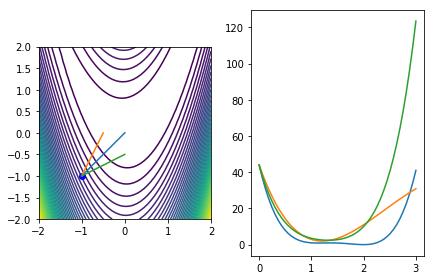

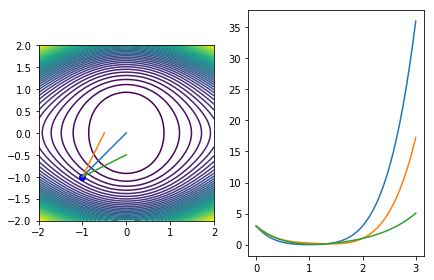

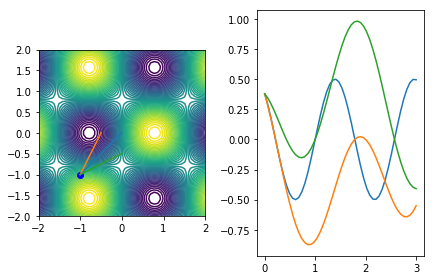

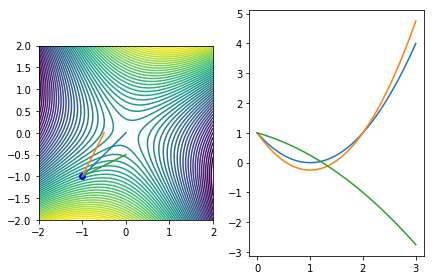

In [14]:
import numpy as np
import matplotlib.pylab as plt

def merit_func_plot(fobj, x0, dirs):
    # Generate the data for a contour plot
    n = 50
    x1 = np.linspace(-2, 2, n)
    x2 = np.linspace(-2, 2, n)
    X1, X2 = np.meshgrid(x1, x2)
    f = np.zeros((n, n))

    # Query the function at the specified locations
    for i in range(n):
        for j in range(n):
            f[i, j] = fobj([X1[i, j], X2[i, j]])

    fig, ax = plt.subplots(1, 2)
    ax[0].contour(X1, X2, f, levels=np.linspace(np.min(f), np.max(f)))
    ax[0].plot([x0[0]], [x0[1]], 'bo')
    ax[0].set_aspect('equal', 'box')
    
    # Plot the directions on the contour plot
    for p in dirs:
        m = 50
        alpha = np.linspace(0, 3, m)
        fvals = np.zeros(m)
        for i, alph in enumerate(alpha):
            fvals[i] = fobj(x0 + alph*p)
        
        ax[0].plot([x0[0], x0[0] + p[0]],
                   [x0[1], x0[1] + p[1]])
        ax[1].plot(alpha, fvals)
    
    fig.tight_layout()

    return

def f1(x):
    return (1 - x[0])**2 + 10*(x[1] - x[0]**2)**2

def f2(x):
    return x[0]**2 + x[0]**2*x[1]**2 + x[1]**4

def f3(x):
    return np.sin(2*x[0])*np.cos(2*x[1])

def f4(x):
    return -x[0]**2 + x[0]*x[1] + x[1]**2

x0 = np.array([-1, -1])
dirs = np.array([[1, 1], [0.5, 1], [1, 0.5]])

for fobj in [f1, f2, f3, f4]:
    merit_func_plot(fobj, x0, dirs)



# Exact Minimizers for Line Search Methods

In some special cases it is possible to efficiently find the exact minimizer of a line search.  Usually we'll be satisfied with an approximate solution, but when the function is quadratic we can find the exact minimzier efficiently.

The exact minimizer satisfies the following condition
\begin{equation*}
    \phi'(\alpha^{*}) = 0 = \nabla f(x + \alpha^{*} p)^{T}p = 0
\end{equation*}

For the special case when $f(x)$ is a quadratic, this can be found as follows

\begin{equation*}
    \nabla f(x + \alpha p) = A(x + \alpha p) + b
\end{equation*}

So that at the minimizer

\begin{equation*}
    p^{T}Ax + \alpha^{*} p^{T} A p + p^{T}b = 0.
\end{equation*}

Rearranging this equation gives

\begin{equation*}
    \alpha^{*} = -\frac{p^{T}(Ax + b)}{p^{T} A p}
\end{equation*}

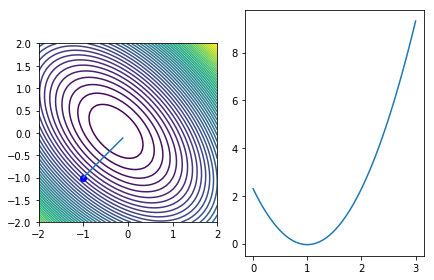

In [18]:
b = np.array([0.5, 0.2])
A = np.array([[2, 1], [1, 2]])

def fquad(x):    
    return 0.5*np.dot(x, np.dot(A, x)) + np.dot(b, x)

x0 = np.array([-1, -1])
p0 = np.array([1, 1])

alph = - np.dot(p0, np.dot(A, x0) + b)/np.dot(p0, np.dot(A, p0))

# Plot the merit function with the line search direction normalized
dirs = [p0*alph]
merit_func_plot(fquad, x0, dirs)